In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\099\AppData\Local\Temp/ipykernel_52112/4216924255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');


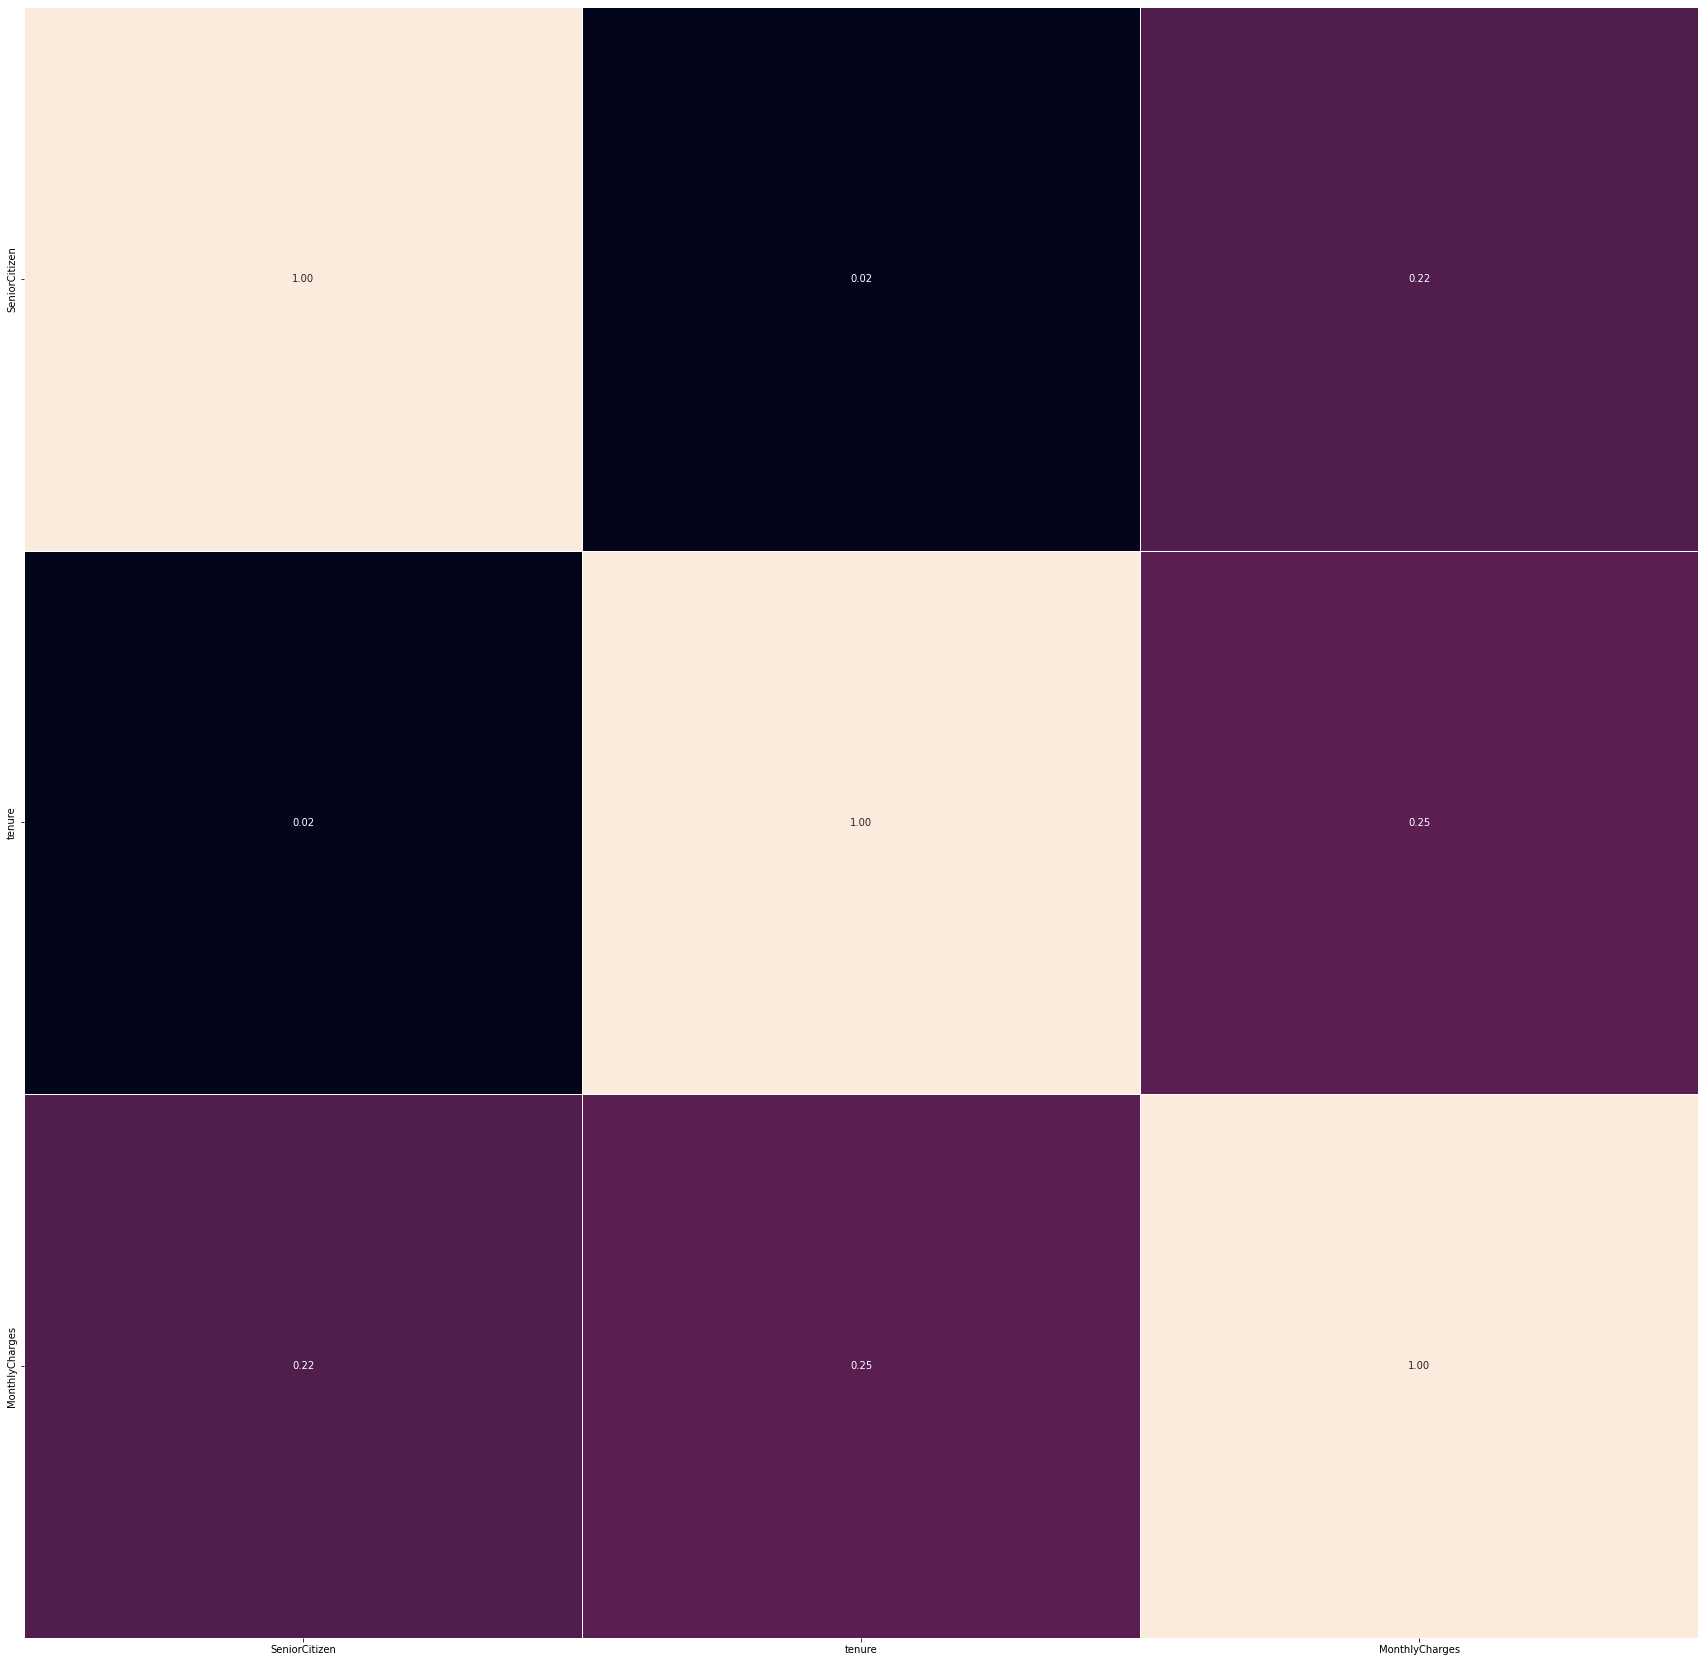

In [5]:
plt.figure(figsize=(30, 30));
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');
plt.show();

In [6]:
# Корреляция между признаками практически отсутсвует 

In [7]:
data.drop(columns = ['customerID', 'MultipleLines', 'TotalCharges'], axis = 1, inplace = True) 

In [8]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
data["gender"] = lenc.fit_transform(data["gender"])
data["Churn"] = lenc.fit_transform(data["Churn"])
data["Partner"] = lenc.fit_transform(data["Partner"])
data["Dependents"] = lenc.fit_transform(data["Dependents"])
data["PhoneService"] = lenc.fit_transform(data["PhoneService"])
data["PaperlessBilling"] = lenc.fit_transform(data["PaperlessBilling"])

In [9]:
from category_encoders import OneHotEncoder
enc = OneHotEncoder()

data = data.drop(['StreamingTV', 'StreamingMovies', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod'], axis = 1).join(enc.fit_transform(data[['StreamingTV', 'StreamingMovies', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod']], axis = 0))

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,StreamingTV_1,...,TechSupport_1,TechSupport_2,TechSupport_3,Contract_1,Contract_2,Contract_3,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4
0,0,0,1,0,1,0,1,29.85,0,1,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,34,1,0,56.95,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,1,1,...,1,0,0,1,0,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,1,1,...,1,0,0,1,0,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Churn'], axis=1), data['Churn'], test_size=0.30, random_state=42
)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7043 non-null   int32  
 1   SeniorCitizen       7043 non-null   int64  
 2   Partner             7043 non-null   int32  
 3   Dependents          7043 non-null   int32  
 4   tenure              7043 non-null   int64  
 5   PhoneService        7043 non-null   int32  
 6   PaperlessBilling    7043 non-null   int32  
 7   MonthlyCharges      7043 non-null   float64
 8   Churn               7043 non-null   int32  
 9   StreamingTV_1       7043 non-null   int64  
 10  StreamingTV_2       7043 non-null   int64  
 11  StreamingTV_3       7043 non-null   int64  
 12  StreamingMovies_1   7043 non-null   int64  
 13  StreamingMovies_2   7043 non-null   int64  
 14  StreamingMovies_3   7043 non-null   int64  
 15  InternetService_1   7043 non-null   int64  
 16  Intern

In [13]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(roc_auc_score(y_test, y_pred))

#print(accuracy_score(y_test, y_pred))
#print(precision_score(y_test, y_pred, pos_label=1))
#print(recall_score(y_test, y_pred, pos_label=1))
print(f1_score(y_test, y_pred, pos_label=1))

0.7099637078242127
0.582178217821782


In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50, 100, 150, 200, 250, 300], 'learning_rate':[0.1, 0.2, 0.5, 1, 2], 'max_depth':[3, 5, 10]}

gs = GridSearchCV(clf, parameters,cv = 5, scoring = 'f1')
gs.fit(X_train, y_train)
print('Best params: ', gs.best_params_)
print('Best accuracy: ', gs.best_score_)

KeyboardInterrupt: 

In [96]:
#!pip install xgboost
#! pip install lightgbm
#! pip install catboost

In [17]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(roc_auc_score(y_test, y_pred))

#print(accuracy_score(y_test, y_pred))
#print(precision_score(y_test, y_pred, pos_label=1))
#print(recall_score(y_test, y_pred, pos_label=1))
print(f1_score(y_test, y_pred, pos_label=1))

0.7022841656987997
0.568683957732949


In [18]:
from catboost import CatBoostClassifier 

clf = CatBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(roc_auc_score(y_test, y_pred))

#print(accuracy_score(y_test, y_pred))
#print(precision_score(y_test, y_pred, pos_label=1))
#print(recall_score(y_test, y_pred, pos_label=1))
print(f1_score(y_test, y_pred, pos_label=1))

Learning rate set to 0.02036
0:	learn: 0.6800353	total: 161ms	remaining: 2m 40s
1:	learn: 0.6671742	total: 171ms	remaining: 1m 25s
2:	learn: 0.6527810	total: 191ms	remaining: 1m 3s
3:	learn: 0.6413539	total: 199ms	remaining: 49.5s
4:	learn: 0.6296683	total: 205ms	remaining: 40.7s
5:	learn: 0.6189524	total: 211ms	remaining: 35s
6:	learn: 0.6091648	total: 216ms	remaining: 30.7s
7:	learn: 0.5989963	total: 223ms	remaining: 27.6s
8:	learn: 0.5896334	total: 228ms	remaining: 25.1s
9:	learn: 0.5811776	total: 234ms	remaining: 23.1s
10:	learn: 0.5736360	total: 240ms	remaining: 21.6s
11:	learn: 0.5660469	total: 246ms	remaining: 20.2s
12:	learn: 0.5589498	total: 251ms	remaining: 19.1s
13:	learn: 0.5527336	total: 257ms	remaining: 18.1s
14:	learn: 0.5463323	total: 263ms	remaining: 17.3s
15:	learn: 0.5398453	total: 269ms	remaining: 16.5s
16:	learn: 0.5336812	total: 275ms	remaining: 15.9s
17:	learn: 0.5281062	total: 280ms	remaining: 15.3s
18:	learn: 0.5228766	total: 286ms	remaining: 14.8s
19:	learn: 0

174:	learn: 0.3885166	total: 1.23s	remaining: 5.8s
175:	learn: 0.3883456	total: 1.24s	remaining: 5.78s
176:	learn: 0.3881918	total: 1.24s	remaining: 5.77s
177:	learn: 0.3880917	total: 1.25s	remaining: 5.76s
178:	learn: 0.3879026	total: 1.25s	remaining: 5.75s
179:	learn: 0.3877301	total: 1.26s	remaining: 5.74s
180:	learn: 0.3875455	total: 1.27s	remaining: 5.73s
181:	learn: 0.3873832	total: 1.27s	remaining: 5.72s
182:	learn: 0.3872116	total: 1.28s	remaining: 5.72s
183:	learn: 0.3870463	total: 1.29s	remaining: 5.71s
184:	learn: 0.3868343	total: 1.29s	remaining: 5.7s
185:	learn: 0.3866826	total: 1.3s	remaining: 5.7s
186:	learn: 0.3864837	total: 1.31s	remaining: 5.69s
187:	learn: 0.3863431	total: 1.31s	remaining: 5.68s
188:	learn: 0.3861023	total: 1.32s	remaining: 5.68s
189:	learn: 0.3859194	total: 1.33s	remaining: 5.67s
190:	learn: 0.3857339	total: 1.34s	remaining: 5.68s
191:	learn: 0.3855775	total: 1.35s	remaining: 5.67s
192:	learn: 0.3853903	total: 1.35s	remaining: 5.66s
193:	learn: 0.38

356:	learn: 0.3631154	total: 2.43s	remaining: 4.38s
357:	learn: 0.3630179	total: 2.44s	remaining: 4.38s
358:	learn: 0.3628915	total: 2.45s	remaining: 4.37s
359:	learn: 0.3627563	total: 2.45s	remaining: 4.36s
360:	learn: 0.3626423	total: 2.46s	remaining: 4.35s
361:	learn: 0.3624677	total: 2.46s	remaining: 4.34s
362:	learn: 0.3622565	total: 2.47s	remaining: 4.34s
363:	learn: 0.3621638	total: 2.48s	remaining: 4.33s
364:	learn: 0.3620648	total: 2.48s	remaining: 4.32s
365:	learn: 0.3620642	total: 2.49s	remaining: 4.31s
366:	learn: 0.3619504	total: 2.5s	remaining: 4.3s
367:	learn: 0.3618044	total: 2.5s	remaining: 4.3s
368:	learn: 0.3616657	total: 2.51s	remaining: 4.29s
369:	learn: 0.3614977	total: 2.51s	remaining: 4.28s
370:	learn: 0.3613750	total: 2.52s	remaining: 4.27s
371:	learn: 0.3612495	total: 2.53s	remaining: 4.26s
372:	learn: 0.3611109	total: 2.53s	remaining: 4.26s
373:	learn: 0.3609989	total: 2.54s	remaining: 4.25s
374:	learn: 0.3609159	total: 2.54s	remaining: 4.24s
375:	learn: 0.36

518:	learn: 0.3430739	total: 3.46s	remaining: 3.21s
519:	learn: 0.3430109	total: 3.47s	remaining: 3.2s
520:	learn: 0.3428514	total: 3.47s	remaining: 3.19s
521:	learn: 0.3427932	total: 3.48s	remaining: 3.19s
522:	learn: 0.3427002	total: 3.49s	remaining: 3.18s
523:	learn: 0.3426226	total: 3.49s	remaining: 3.17s
524:	learn: 0.3425389	total: 3.5s	remaining: 3.17s
525:	learn: 0.3424082	total: 3.51s	remaining: 3.16s
526:	learn: 0.3422936	total: 3.51s	remaining: 3.15s
527:	learn: 0.3421778	total: 3.52s	remaining: 3.15s
528:	learn: 0.3421121	total: 3.53s	remaining: 3.14s
529:	learn: 0.3420010	total: 3.53s	remaining: 3.13s
530:	learn: 0.3419333	total: 3.54s	remaining: 3.13s
531:	learn: 0.3417809	total: 3.55s	remaining: 3.12s
532:	learn: 0.3416554	total: 3.55s	remaining: 3.11s
533:	learn: 0.3415488	total: 3.56s	remaining: 3.11s
534:	learn: 0.3414399	total: 3.56s	remaining: 3.1s
535:	learn: 0.3413302	total: 3.57s	remaining: 3.09s
536:	learn: 0.3412571	total: 3.58s	remaining: 3.08s
537:	learn: 0.3

697:	learn: 0.3248468	total: 4.66s	remaining: 2.02s
698:	learn: 0.3246894	total: 4.67s	remaining: 2.01s
699:	learn: 0.3245881	total: 4.67s	remaining: 2s
700:	learn: 0.3245304	total: 4.68s	remaining: 2s
701:	learn: 0.3244739	total: 4.69s	remaining: 1.99s
702:	learn: 0.3243878	total: 4.69s	remaining: 1.98s
703:	learn: 0.3243005	total: 4.7s	remaining: 1.98s
704:	learn: 0.3242219	total: 4.71s	remaining: 1.97s
705:	learn: 0.3241253	total: 4.71s	remaining: 1.96s
706:	learn: 0.3240391	total: 4.72s	remaining: 1.96s
707:	learn: 0.3239326	total: 4.72s	remaining: 1.95s
708:	learn: 0.3238356	total: 4.73s	remaining: 1.94s
709:	learn: 0.3237645	total: 4.74s	remaining: 1.94s
710:	learn: 0.3236523	total: 4.74s	remaining: 1.93s
711:	learn: 0.3235690	total: 4.75s	remaining: 1.92s
712:	learn: 0.3234685	total: 4.76s	remaining: 1.91s
713:	learn: 0.3233749	total: 4.76s	remaining: 1.91s
714:	learn: 0.3232801	total: 4.77s	remaining: 1.9s
715:	learn: 0.3231443	total: 4.78s	remaining: 1.89s
716:	learn: 0.323071

868:	learn: 0.3093992	total: 5.83s	remaining: 879ms
869:	learn: 0.3093577	total: 5.84s	remaining: 872ms
870:	learn: 0.3093008	total: 5.84s	remaining: 865ms
871:	learn: 0.3091939	total: 5.85s	remaining: 859ms
872:	learn: 0.3091453	total: 5.86s	remaining: 852ms
873:	learn: 0.3090543	total: 5.86s	remaining: 845ms
874:	learn: 0.3089732	total: 5.87s	remaining: 839ms
875:	learn: 0.3088818	total: 5.88s	remaining: 832ms
876:	learn: 0.3088078	total: 5.88s	remaining: 825ms
877:	learn: 0.3086986	total: 5.89s	remaining: 818ms
878:	learn: 0.3086206	total: 5.89s	remaining: 812ms
879:	learn: 0.3085651	total: 5.9s	remaining: 805ms
880:	learn: 0.3084624	total: 5.91s	remaining: 798ms
881:	learn: 0.3084263	total: 5.92s	remaining: 792ms
882:	learn: 0.3083559	total: 5.92s	remaining: 785ms
883:	learn: 0.3082927	total: 5.93s	remaining: 778ms
884:	learn: 0.3082156	total: 5.94s	remaining: 772ms
885:	learn: 0.3081322	total: 5.94s	remaining: 765ms
886:	learn: 0.3080421	total: 5.95s	remaining: 758ms
887:	learn: 0

In [19]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(roc_auc_score(y_test, y_pred))

#print(accuracy_score(y_test, y_pred))
#print(precision_score(y_test, y_pred, pos_label=1))
#print(recall_score(y_test, y_pred, pos_label=1))
print(f1_score(y_test, y_pred, pos_label=1))

0.7129584349310494
0.5852272727272727
